<a href="https://colab.research.google.com/github/safeai-snu/TimeSeriesAI/blob/main/ch3/ch3_Transformer_and_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Time Series 딥러닝 학습 예제**

참고: https://github.com/thuml/Time-Series-Library



#### **Github에서 .py 파일 다운로드**

In [1]:
!git clone https://github.com/safeai-snu/TimeSeriesAI.git
%cd TimeSeriesAI/ch3

Cloning into 'TimeSeriesAI'...
remote: Enumerating objects: 573, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 573 (delta 196), reused 252 (delta 140), pack-reused 231 (from 1)
Receiving objects: 100% (573/573), 51.50 MiB | 11.21 MiB/s, done.
Resolving deltas: 100% (272/272), done.
Updating files: 100% (131/131), done.
/content/TimeSeriesAI/ch3


#### **원하는 학습 파라미터 지정**

In [2]:
import numpy as np
import argparse
from exp.exp_main import Exp_Main
import random
import torch

fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

parser = argparse.ArgumentParser(description='HD')

parser.add_argument('--model', type=str, default='Informer')
parser.add_argument('--seq_len', type=int, default=48, help='input sequence length')
parser.add_argument('--label_len', type=int, default=24, help='start token length')
parser.add_argument('--pred_len', type=int, default=48, help='prediction sequence length')

args = parser.parse_args(args=[])
args.use_gpu = True if torch.cuda.is_available() else False

print('Args in experiment:')
print(args)

Args in experiment:
Namespace(model='Informer', seq_len=48, label_len=24, pred_len=48, use_gpu=True)


#### **모델 학습**

In [3]:
Exp = Exp_Main
exp = Exp(args)
setting = '{}_sl{}_pl{}'.format(args.model, args.seq_len, args.pred_len)
exp.train(setting)

Use GPU: cuda:0
train 8545
val 2833
test 2833
	iters: 100, epoch: 1 | loss: 0.4370818
	speed: 0.0722s/iter; left time: 185.6280s
	iters: 200, epoch: 1 | loss: 0.4755934
	speed: 0.0433s/iter; left time: 107.0382s
Epoch: 1 cost time: 13.183473110198975
Epoch: 1, Steps: 267 | Train Loss: 0.5042599 Vali Loss: 1.1066836 Test Loss: 0.8538309
Validation loss decreased (inf --> 1.106684).  Saving model ...
Updating learning rate to 0.01
	iters: 100, epoch: 2 | loss: 0.4636380
	speed: 0.1257s/iter; left time: 289.5642s
	iters: 200, epoch: 2 | loss: 0.4339673
	speed: 0.0441s/iter; left time: 97.1902s
Epoch: 2 cost time: 11.674877405166626
Epoch: 2, Steps: 267 | Train Loss: 0.4725710 Vali Loss: 1.0784202 Test Loss: 0.8256472
Validation loss decreased (1.106684 --> 1.078420).  Saving model ...
Updating learning rate to 0.005
	iters: 100, epoch: 3 | loss: 0.5156240
	speed: 0.0915s/iter; left time: 186.2903s
	iters: 200, epoch: 3 | loss: 0.4554978
	speed: 0.0453s/iter; left time: 87.7011s
Epoch: 3 c

In [5]:
preds, trues, inputx = exp.test(setting)
torch.cuda.empty_cache()

test 2833
mse:0.8817364573478699, mae:0.6719339489936829, rmse:0.9390082359313965


In [13]:
parser = argparse.ArgumentParser(description='HD')

parser.add_argument('--model', type=str, default='DLinear')
parser.add_argument('--seq_len', type=int, default=48, help='input sequence length')
parser.add_argument('--label_len', type=int, default=24, help='start token length')
parser.add_argument('--pred_len', type=int, default=48, help='prediction sequence length')

args = parser.parse_args(args=[])
args.use_gpu = True if torch.cuda.is_available() else False

print('Args in experiment:')
print(args)

Args in experiment:
Namespace(model='DLinear', seq_len=48, label_len=24, pred_len=48, use_gpu=True)


In [14]:
Exp = Exp_Main
exp = Exp(args)
setting = '{}_sl{}_pl{}'.format(args.model, args.seq_len, args.pred_len)
exp.train(setting)

Use GPU: cuda:0
train 8545
val 2833
test 2833
	iters: 100, epoch: 1 | loss: 0.3955944
	speed: 0.0115s/iter; left time: 29.5234s
	iters: 200, epoch: 1 | loss: 0.3599916
	speed: 0.0051s/iter; left time: 12.4970s
Epoch: 1 cost time: 2.1409592628479004
Epoch: 1, Steps: 267 | Train Loss: 0.3418776 Vali Loss: 0.5222647 Test Loss: 0.3737909
Validation loss decreased (inf --> 0.522265).  Saving model ...
Updating learning rate to 0.01
	iters: 100, epoch: 2 | loss: 0.3112001
	speed: 0.0299s/iter; left time: 68.8700s
	iters: 200, epoch: 2 | loss: 0.3664490
	speed: 0.0053s/iter; left time: 11.6027s
Epoch: 2 cost time: 1.875929594039917
Epoch: 2, Steps: 267 | Train Loss: 0.3371536 Vali Loss: 0.5299445 Test Loss: 0.3673136
EarlyStopping counter: 1 out of 3
Updating learning rate to 0.005
	iters: 100, epoch: 3 | loss: 0.2687288
	speed: 0.0541s/iter; left time: 110.2966s
	iters: 200, epoch: 3 | loss: 0.3792759
	speed: 0.0080s/iter; left time: 15.5617s
Epoch: 3 cost time: 3.037348985671997
Epoch: 3, S

In [15]:
preds2, trues2, inputx2 = exp.test(setting)
torch.cuda.empty_cache()

test 2833
mse:0.3488721549510956, mae:0.37179648876190186, rmse:0.5906540155410767


#### **모델 간 비교**

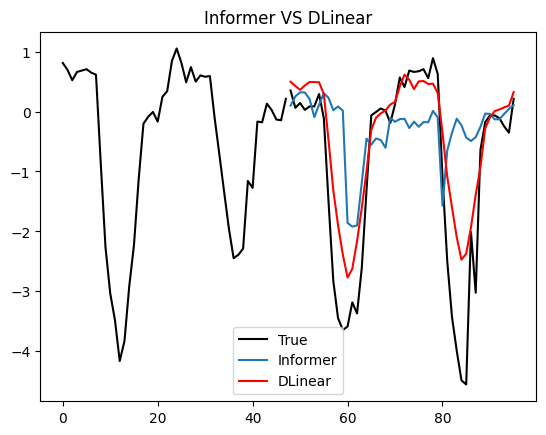

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Informer VS DLinear')
plt.plot(np.arange(args.seq_len),inputx2[0,:,0], label='True', c='k')
plt.plot(np.arange(args.pred_len)+args.seq_len,trues2[0,:,0], c='k')
plt.plot(np.arange(args.pred_len)+args.seq_len,preds[0,:,0], label='Informer')
plt.plot(np.arange(args.pred_len)+args.seq_len,preds2[0,:,0], label='DLinear', c='r')
plt.legend()
plt.show()